In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from geopy.distance import geodesic
import sys
!{sys.executable} -m pip install geopy
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from random import uniform
import joblib

In [2]:
df = pd.read_csv('train_cab.csv')

In [3]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df = df[['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare_amount']]

In [6]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3


In [8]:
pd.DataFrame(df.isnull().sum())

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55
fare_amount,24


In [30]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
#Data visualisation

In [13]:
cat_var = df['passenger_count']
num_var = df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','fare_amount']]

In [14]:
num_var.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
0,-73.844311,40.721319,-73.841610,40.712278,4.5
1,-74.016048,40.711303,-73.979268,40.782004,16.9
2,-73.982738,40.761270,-73.991242,40.750562,5.7
3,-73.987130,40.733143,-73.991567,40.758092,7.7
4,-73.968095,40.768008,-73.956655,40.783762,5.3


In [12]:
sns.set(style='darkgrid',palette='deep')

In [23]:
df[df['fare_amount'] == '430-'].index

Int64Index([1123], dtype='int64')

In [26]:
df['fare_amount'][1123] = np.nan

In [ ]:
#Data Preprocessing
#Outlier analysis

In [32]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3


In [37]:
type(df['fare_amount'])
df['fare_amount'].dtype

dtype('float64')

In [36]:
df['fare_amount'] = pd.to_numeric(df['fare_amount'],errors='coerce')

In [38]:
sum(df['fare_amount'] < 1)

5

In [43]:
idx = df[df['fare_amount']  < 1].index

In [50]:
df = df.drop(index=idx, axis=0)

In [52]:
df.shape

(16062, 7)

In [ ]:
#Passenger Count

In [56]:
df.passenger_count.value_counts()

1.00       11255
2.00        2322
5.00        1045
3.00         676
4.00         328
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [57]:
df.passenger_count.dtype

dtype('float64')

In [ ]:
#For a taxi passenger count cannot be greater than 6 and cannot be less than 1

In [58]:
#Total passenger count greater than 6
sum(df['passenger_count'] > 6)

20

In [59]:
#Total passenger count less than 1
sum(df['passenger_count'] < 1)

58

In [ ]:
#Therefore a total of 78 values need to be dropped as they do not fit in the range of passengers for a taxi

In [64]:
idx = list(df[df['passenger_count'] < 1].index)

In [65]:
#len(idx)
idx.extend(df[df['passenger_count'] > 6].index)

In [68]:
df = df.drop(index=idx,axis=0)

In [69]:
df.shape

(15984, 7)

In [72]:
df.passenger_count.value_counts()

1.0    11255
2.0     2322
5.0     1045
3.0      676
4.0      328
6.0      302
1.3        1
Name: passenger_count, dtype: int64

In [73]:
df[df['passenger_count'] == 1.3].index

Int64Index([8790], dtype='int64')

In [77]:
df['passenger_count'][8790] = np.nan

C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
df['passenger_count'][8790]

nan

In [80]:
df.passenger_count.value_counts()
df.passenger_count.unique()

array([ 1.,  2.,  3., nan,  6.,  5.,  4.])

In [81]:
pd.DataFrame(df.isnull().sum())

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,56
fare_amount,24


In [ ]:
#The number of nan values as compared to the size of the data set is fiarly insignificant ~ 0.003, and hence can be dropped 

In [82]:
df = df.dropna()

In [83]:
df.shape

(15904, 7)

In [84]:
pd.DataFrame(df.isnull().sum())

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
fare_amount,0


In [ ]:
#To check if the latitudes and longitudes are in the proper range
#Latitudes range from -90 to 90 
#Longitudes range from -180 to 180

In [98]:
print('pickup_longitude > 180 :' + str(sum(df['pickup_longitude'] > 180)))
print('pickup_longitude < -180 :' + str(sum(df['pickup_longitude'] < -180)))
print('pickup_latitude > 90 :' + str(sum(df['pickup_latitude'] > 90)))
print('pickup_latitude < -90 :' + str(sum(df['pickup_latitude'] < -90)))

print('dropoff_longitude > 180 :' + str(sum(df['dropoff_longitude'] > 180)))
print('dropoff_longitude < -180 :' + str(sum(df['dropoff_longitude'] < -180)))
print('dropoff_latitude > 90 :' + str(sum(df['dropoff_latitude'] > 90)))
print('dropoff_latitude < -90 :' + str(sum(df['dropoff_latitude'] < -90)))

pickup_longitude > 180 :0
pickup_longitude < -180 :0
pickup_latitude > 90 :1
pickup_latitude < -90 :0
dropoff_longitude > 180 :0
dropoff_longitude < -180 :0
dropoff_latitude > 90 :0
dropoff_latitude < -90 :0


In [102]:
df[df['pickup_latitude'] > 90].index[0]

5686

In [103]:
df = df.drop(index=df[df['pickup_latitude'] > 90].index[0])

In [104]:
df.shape

(15903, 7)

In [ ]:
#To check if any latitude or longitude is 0

In [106]:
for i in ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']:
    print(i + ' equal to 0 = ' + str(sum(df[i] == 0)))

pickup_longitude equal to 0 = 309
pickup_latitude equal to 0 = 309
dropoff_longitude equal to 0 = 310
dropoff_latitude equal to 0 = 308


In [109]:
df[df['pickup_longitude'] == 0].index

Int64Index([   11,    15,   124,   192,   273,   357,   376,   387,   472,
              540,
            ...
            15648, 15665, 15764, 15783, 15911, 15920, 15929, 15937, 16014,
            16056],
           dtype='int64', length=309)

In [110]:
#Dropping all values equal to 0
for i in ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']:
    df = df.drop(index=df[df[i] == 0].index)

In [111]:
df.shape

(15583, 7)

In [112]:
df_train = df.copy()

In [115]:
df['pickup_datetime'].dtype

dtype('O')

In [116]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [124]:
pd.DataFrame(df.isnull().sum())

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
fare_amount,0


In [121]:
#Dropping the row with nan datetime

In [123]:
df = df.dropna()

In [126]:
df.shape

(15582, 7)

In [ ]:
#Outlier Analysis

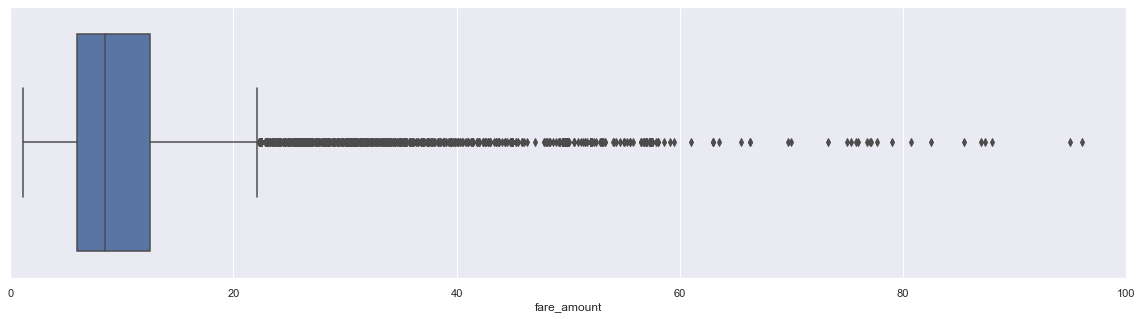

In [129]:
#Box plot for seeking the outliers in the fare_amount variable
plt.figure(figsize=(20,5))
plt.xlim(0,100)
sns.boxplot(x = df['fare_amount'], data=df)

In [143]:
df['passenger_count'] = df.passenger_count.astype('int')

In [144]:
df.passenger_count.unique()
df.passenger_count.value_counts()

1    10999
2     2283
5     1024
3      662
4      319
6      295
Name: passenger_count, dtype: int64

In [149]:
df['passenger_count'] = df['passenger_count'].astype('object').astype('category')

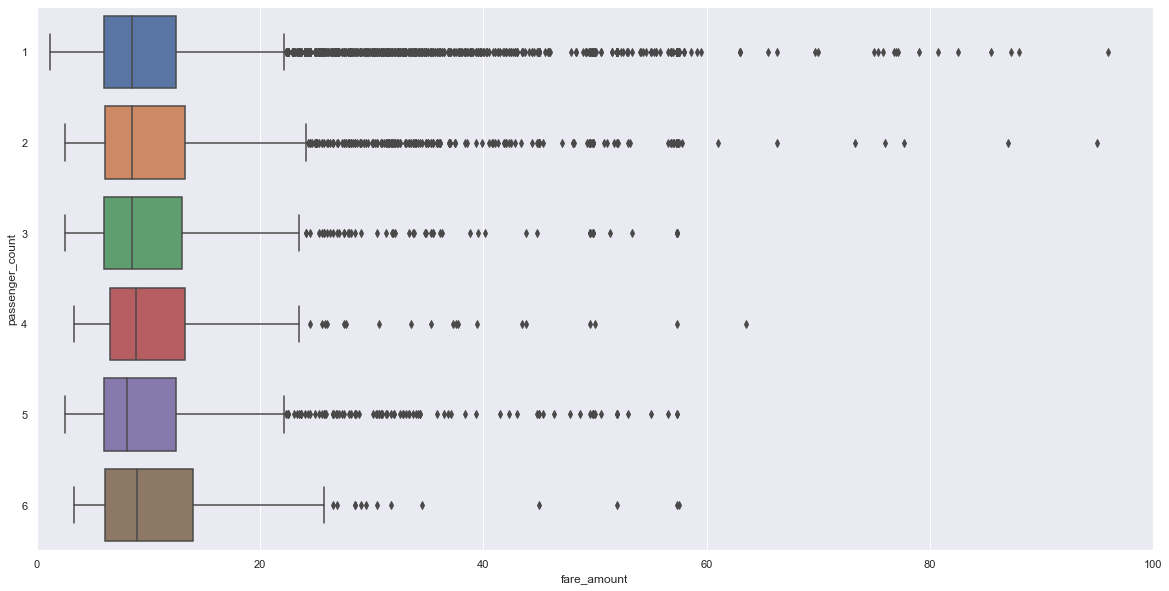

In [151]:
#Box plot for fare_amount vs passenger_count
plt.figure(figsize=(20,10))
plt.xlim(0,100)
sns.boxplot(x=df['fare_amount'], y=df['passenger_count'],data=df)

In [164]:
#function to convert all outliers to nan
def outlier_detect(col):
    q75,q25 = np.percentile(df.loc[:,col], [75,25])
    iqr = q75 - q25 #interquartile range
    min_val = q25 - (1.5*iqr)
    max_val = q75 + (1.5*iqr)
    
    print(min_val,max_val)
    #return min_val, max_val
    
    #assigning the outliers as nan
    df.loc[df[col] < min_val, col] = np.nan
    df.loc[df[col] > max_val, col] = np.nan

In [165]:
outlier_detect('fare_amount')

-3.75 22.25


In [166]:
pd.DataFrame(df.isnull().sum())

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
fare_amount,1355


In [ ]:
#Recomputing the nan values

In [168]:
#Creating a checkpoint
df_train1 = df.copy()

In [194]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,4.5
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16.9
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,5.7
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,7.7
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,5.3


In [170]:
pickup_datetime = pd.DataFrame(df['pickup_datetime'])

In [172]:
pickup_datetime.isnull().sum()

pickup_datetime    0
dtype: int64

In [195]:
del df['pickup_datetime']

In [196]:
df.isnull().sum()

pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
fare_amount          1355
dtype: int64

In [191]:
#df_train1.to_csv('train1.csv')

In [197]:
#Imputing missing values using KNN
df = pd.DataFrame(KNN(k=3).fit_transform(df), columns=df.columns, index=df.index)

Imputing row 1/15582 with 0 missing, elapsed time: 80.018
Imputing row 101/15582 with 0 missing, elapsed time: 89.538
Imputing row 201/15582 with 1 missing, elapsed time: 89.542
Imputing row 301/15582 with 0 missing, elapsed time: 89.544
Imputing row 401/15582 with 0 missing, elapsed time: 89.548
Imputing row 501/15582 with 0 missing, elapsed time: 89.553
Imputing row 601/15582 with 0 missing, elapsed time: 89.557
Imputing row 701/15582 with 0 missing, elapsed time: 89.562
Imputing row 801/15582 with 0 missing, elapsed time: 89.566
Imputing row 901/15582 with 1 missing, elapsed time: 89.567
Imputing row 1001/15582 with 0 missing, elapsed time: 89.595
Imputing row 1101/15582 with 1 missing, elapsed time: 89.601
Imputing row 1201/15582 with 1 missing, elapsed time: 89.607
Imputing row 1301/15582 with 0 missing, elapsed time: 89.615
Imputing row 1401/15582 with 0 missing, elapsed time: 89.627
Imputing row 1501/15582 with 0 missing, elapsed time: 89.633
Imputing row 1601/15582 with 0 missi

Imputing row 13701/15582 with 1 missing, elapsed time: 90.408
Imputing row 13801/15582 with 0 missing, elapsed time: 90.565
Imputing row 13901/15582 with 0 missing, elapsed time: 90.574
Imputing row 14001/15582 with 0 missing, elapsed time: 90.583
Imputing row 14101/15582 with 0 missing, elapsed time: 90.590
Imputing row 14201/15582 with 0 missing, elapsed time: 90.596
Imputing row 14301/15582 with 0 missing, elapsed time: 90.600
Imputing row 14401/15582 with 0 missing, elapsed time: 90.604
Imputing row 14501/15582 with 0 missing, elapsed time: 90.608
Imputing row 14601/15582 with 0 missing, elapsed time: 90.612
Imputing row 14701/15582 with 0 missing, elapsed time: 90.615
Imputing row 14801/15582 with 0 missing, elapsed time: 90.618
Imputing row 14901/15582 with 1 missing, elapsed time: 90.620
Imputing row 15001/15582 with 0 missing, elapsed time: 90.623
Imputing row 15101/15582 with 0 missing, elapsed time: 90.626
Imputing row 15201/15582 with 0 missing, elapsed time: 90.628
Imputing

In [198]:
df.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

In [201]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,15582.000000,15582.000000,15582.000000,15582.000000,15582.000000,15582.000000
mean,-73.911162,40.689397,-73.905955,40.687326,1.650430,9.404469
std,2.665778,2.619918,2.717693,2.639060,1.265907,4.478935
min,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,1.140000
25%,-73.992374,40.736548,-73.991367,40.736298,1.000000,6.000000
50%,-73.982047,40.753302,-73.980547,40.754220,1.000000,8.200000
75%,-73.968058,40.767803,-73.965362,40.768311,2.000000,11.788515
max,40.766125,41.366138,40.802437,41.366138,6.000000,22.100000


In [202]:
#Merging datetime with the rest
df = pd.merge(pickup_datetime, df, left_index=True, right_index=True)

In [203]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3


In [204]:
#Creating a checkpoint
df_train2 = df.copy()

In [ ]:
#Feature Engineering
#1 extracting data from datetime such as month, day, year etc

In [207]:
day = []
for i in[df]:
    day.append(df['pickup_datetime'].apply(lambda row: row.dayofweek))

In [208]:
day

[0        0
 1        1
 2        3
 3        5
 4        1
         ..
 16061    2
 16062    4
 16063    0
 16064    2
 16065    1
 Name: pickup_datetime, Length: 15582, dtype: int64]

In [209]:
#function to extract features which can be used later for test set as well
def extract_times(data):
    data['year'] = data['pickup_datetime'].apply(lambda row: row.year)
    data['month'] = data['pickup_datetime'].apply(lambda row: row.month)
    data['day_of_week'] = data['pickup_datetime'].apply(lambda row: row.dayofweek)
    data['hour'] = data['pickup_datetime'].apply(lambda row: row.hour)
        

In [210]:
extract_times(df)

In [211]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day_of_week,hour
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5,2009,6,0,17
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9,2010,1,1,16
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7,2011,8,3,0
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7,2012,4,5,4
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3,2010,3,1,7


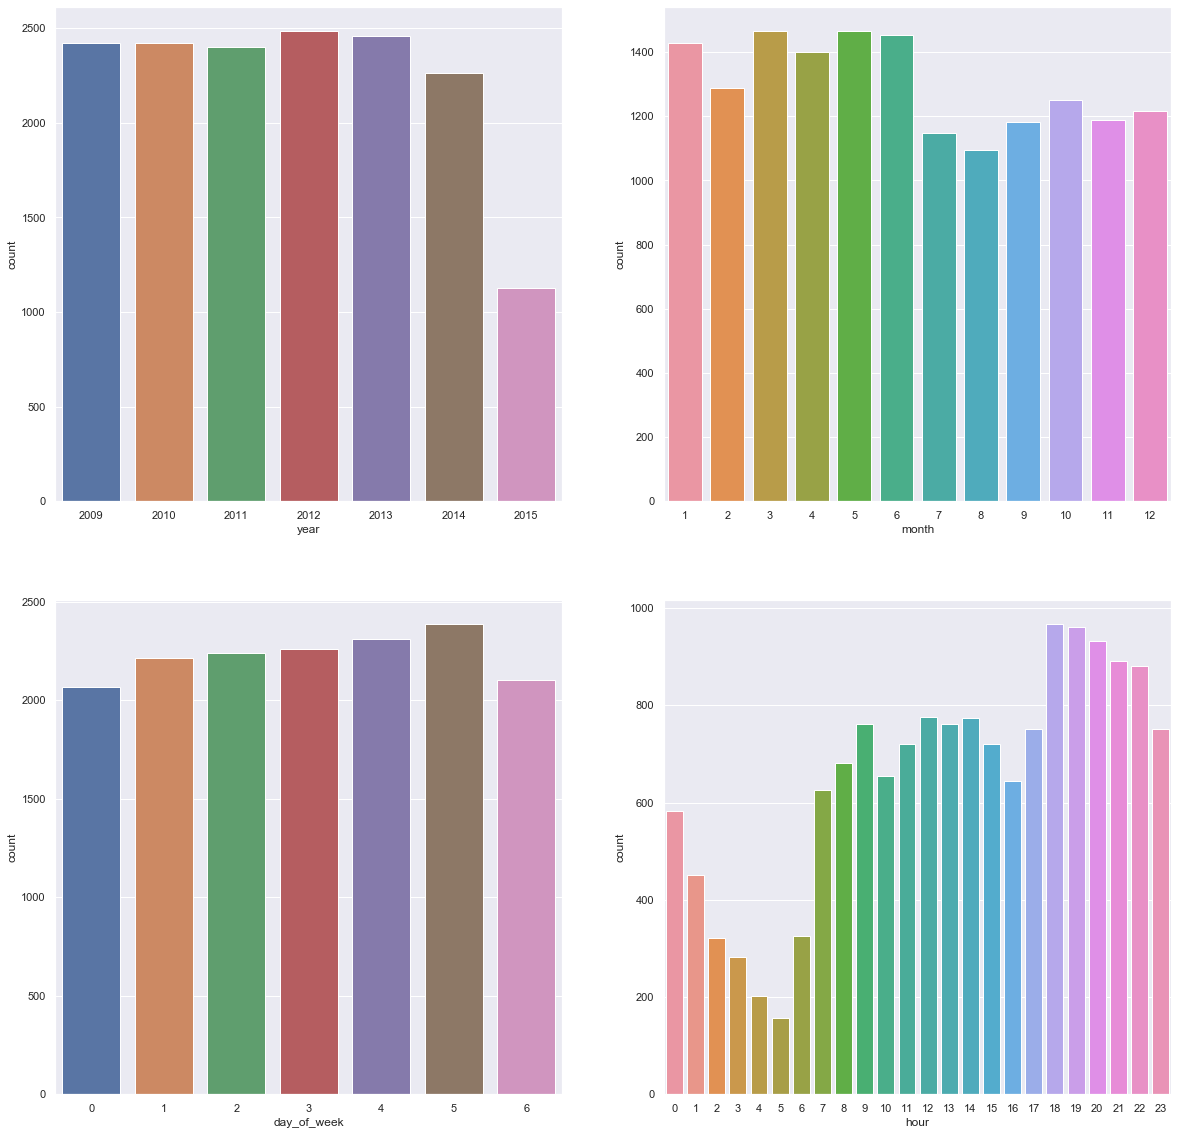

In [212]:
#Plot to see the relation between taxi rides and various time components
plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.countplot(df['year'])
plt.subplot(222)
_=sns.countplot(df['month'])
plt.subplot(223)
_=sns.countplot(df['day_of_week'])
plt.subplot(224)
_=sns.countplot(df['hour'])

In [213]:
#To categorise time_of_day

def cat_time(x):
    if 5 <= x <= 11:
        return 'morning'
    if 12 <= x <= 16:
        return 'afternoon'
    if 17 <= x <= 20:
        return 'evening'
    if 21 <= x <= 23:
        return 'night_PM'
    if 0 <= x <= 4:
        return 'night_AM'

In [214]:
#To categorize months into seasons:
def cat_seasons(x):
    if 3 <= x <= 6:
        return 'summer'
    if 7 <= x <= 10:
        return 'monsoon'
    if x >= 11 or x <= 2:
        return 'winter'

In [216]:
#To categorize day_of_week to weekend/weekday
def cat_week(x):
    if 0 <= x <= 4:
        return 'weekday'
    if 5 <= x <= 6:
        return 'weekend'

In [217]:
#Applying new categories to df
df['session'] = df['hour'].apply(cat_time)
df['season'] = df['month'].apply(cat_seasons)
df['week'] = df['day_of_week'].apply(cat_week)

In [220]:
df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
year                 0
month                0
day_of_week          0
hour                 0
session              0
season               0
week                 0
dtype: int64

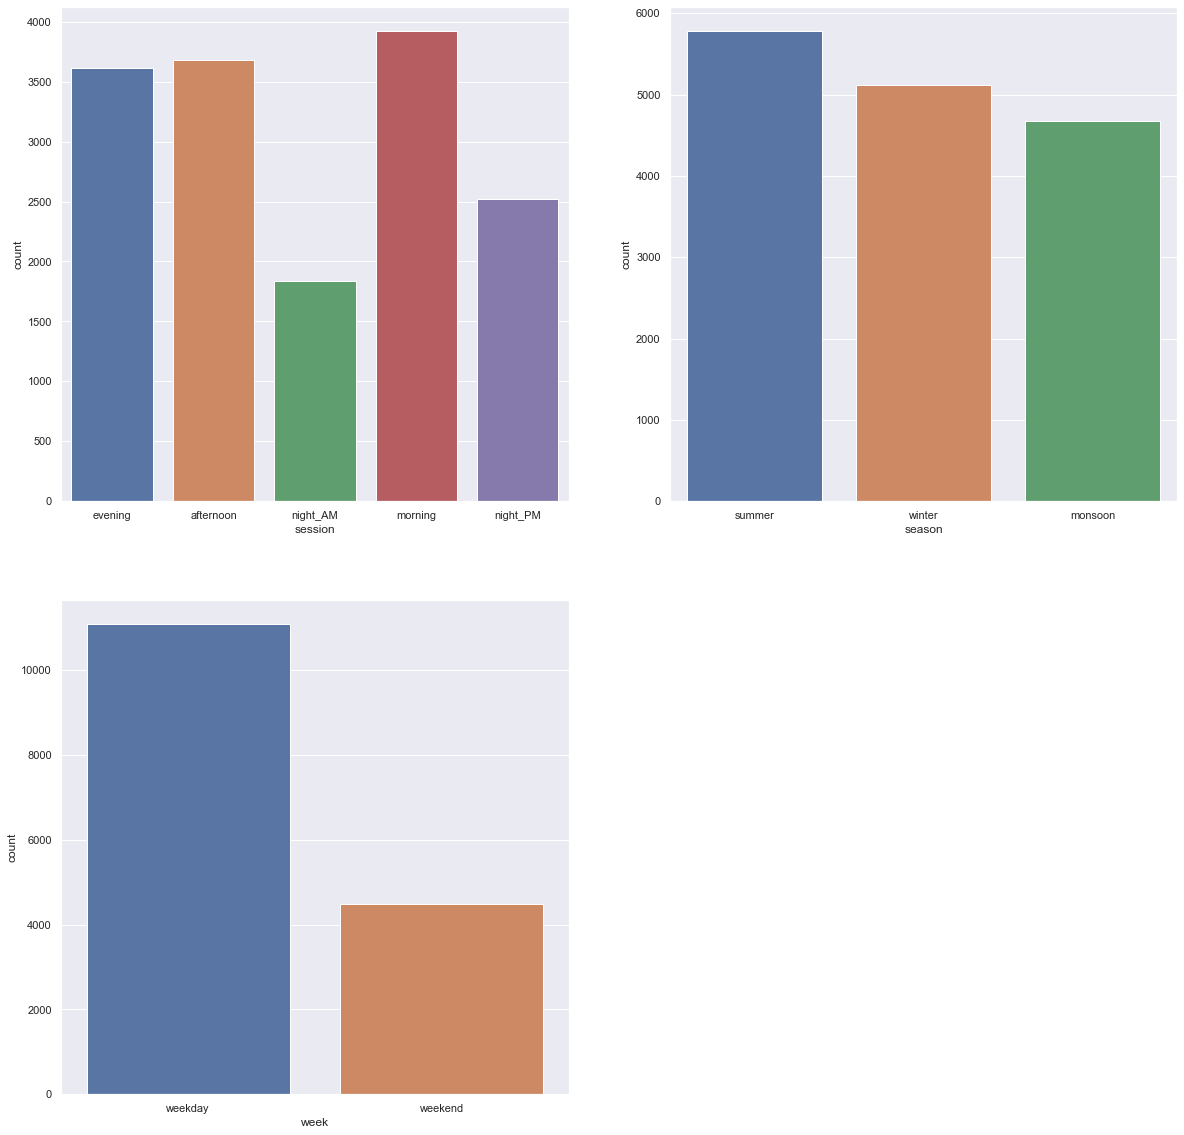

In [221]:
plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.countplot(df['session'])
plt.subplot(222)
_=sns.countplot(df['season'])
plt.subplot(223)
_=sns.countplot(df['week'])

In [222]:
df.shape

(15582, 14)

In [ ]:
#Adding dummy variables to categorical data 

In [223]:
df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'fare_amount', 'year', 'month', 'day_of_week', 'hour', 'session',
       'season', 'week'],
      dtype='object')

In [225]:
cat_columns = ['passenger_count','year','session','season', 'week']

In [233]:
def add_dummies(data):
    for i in cat_columns:
        temp = pd.get_dummies(data[i], prefix=i)
        data = data.join(temp)
        
    return data
    

In [229]:
#creating a checkpoint
df_train3 = df.copy()

In [236]:
df = add_dummies(df)

In [237]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day_of_week,...,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,season_monsoon,season_summer,season_winter,week_weekday,week_weekend
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5,2009,6,0,...,0,1,0,0,0,0,1,0,1,0
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9,2010,1,1,...,1,0,0,0,0,0,0,1,1,0
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7,2011,8,3,...,0,0,0,1,0,1,0,0,1,0
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7,2012,4,5,...,0,0,0,1,0,0,1,0,0,1
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3,2010,3,1,...,0,0,1,0,0,0,1,0,1,0


In [238]:
df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'fare_amount', 'year', 'month', 'day_of_week', 'hour', 'session',
       'season', 'week', 'passenger_count_1.0', 'passenger_count_2.0',
       'passenger_count_3.0', 'passenger_count_4.0', 'passenger_count_5.0',
       'passenger_count_6.0', 'year_2009', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'session_afternoon',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'season_monsoon', 'season_summer', 'season_winter',
       'week_weekday', 'week_weekend'],
      dtype='object')

In [ ]:
#Dropping one column of every one hot encoded variable

In [444]:
columns_to_drop = ['passenger_count_1.0','year_2009','session_afternoon','season_monsoon','week_weekday']

In [240]:
df = df.drop(columns=columns_to_drop, axis=1)

In [241]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day_of_week,...,year_2013,year_2014,year_2015,session_evening,session_morning,session_night_AM,session_night_PM,season_summer,season_winter,week_weekend
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5,2009,6,0,...,0,0,0,1,0,0,0,1,0,0
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9,2010,1,1,...,0,0,0,0,0,0,0,0,1,0
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7,2011,8,3,...,0,0,0,0,0,1,0,0,0,0
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7,2012,4,5,...,0,0,0,0,0,1,0,1,0,1
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3,2010,3,1,...,0,0,0,0,1,0,0,1,0,0


In [242]:
#creating checkpoint
df_train3 = df.copy()

In [ ]:
#Calculating distance using the pickup latitude-longitude and dropoff latitude-longitude

In [258]:
df.shape[0]

15582

In [276]:
def calc_distance(data):
    data['distance_km'] = data.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']),(x['dropoff_latitude'],x['dropoff_longitude'])).kilometers, axis = 1)
    return data

In [277]:
df = calc_distance(df)

In [278]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day_of_week,...,year_2014,year_2015,session_evening,session_morning,session_night_AM,session_night_PM,season_summer,season_winter,week_weekend,distance_km
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5,2009,6,0,...,0,0,1,0,0,0,1,0,0,1.029601
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9,2010,1,1,...,0,0,0,0,0,0,0,1,0,8.443441
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7,2011,8,3,...,0,0,0,0,1,0,0,0,0,1.389132
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7,2012,4,5,...,0,0,0,0,1,0,1,0,1,2.795790
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3,2010,3,1,...,0,0,0,1,0,0,1,0,0,1.998338


In [279]:
#creating checkpoint
df_train4 = df.copy()

In [280]:
df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'fare_amount', 'year', 'month', 'day_of_week', 'hour', 'session',
       'season', 'week', 'passenger_count_2.0', 'passenger_count_3.0',
       'passenger_count_4.0', 'passenger_count_5.0', 'passenger_count_6.0',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'season_summer', 'season_winter', 'week_weekend',
       'distance_km'],
      dtype='object')

In [281]:
#Dropping all variables used in feature engineering
vars_to_drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
                'year', 'month', 'day_of_week', 'hour', 'session','season', 'week']

In [282]:
def drop_fe_vars(data):
    data = data.drop(vars_to_drop, axis = 1)
    return data

In [283]:
df = drop_fe_vars(df)

In [284]:
df.head()

,fare_amount,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,session_evening,session_morning,session_night_AM,session_night_PM,season_summer,season_winter,week_weekend,distance_km
0,4.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1.029601
1,16.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,8.443441
2,5.7,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.389132
3,7.7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,2.795790
4,5.3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.998338


In [286]:
df.shape

(15582, 20)

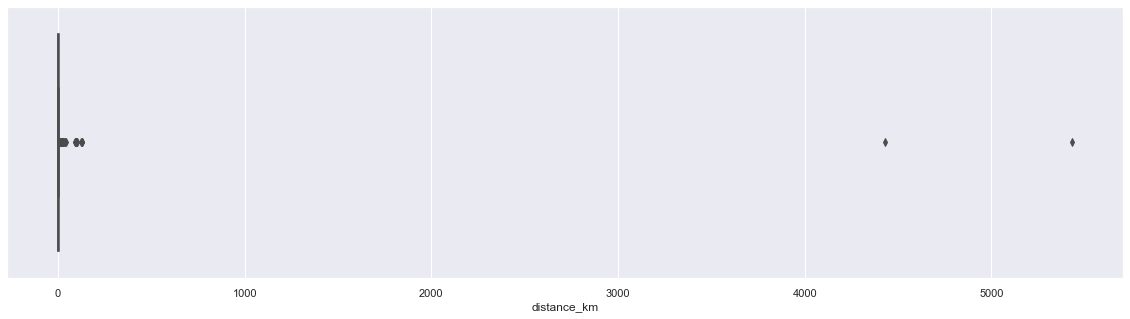

In [287]:
#Value analysis of the new distance_km variable
plt.figure(figsize=(20,5))
sns.boxplot(df['distance_km'])

In [288]:
outlier_detect('distance_km')

-2.709579918100085 7.870814081174286


In [289]:
pd.DataFrame(df.isnull().sum())

,0
fare_amount,0
passenger_count_2.0,0
passenger_count_3.0,0
passenger_count_4.0,0
passenger_count_5.0,0
passenger_count_6.0,0
year_2010,0
year_2011,0
year_2012,0
year_2013,0


In [290]:
#df_train5 = df.copy()

In [ ]:
#Applying KNN to impute the missing values of the distance_km variable

In [291]:
df = pd.DataFrame(KNN(k=3).fit_transform(df),index=df.index, columns=df.columns)

Imputing row 1/15582 with 0 missing, elapsed time: 146.215
Imputing row 101/15582 with 0 missing, elapsed time: 162.305
Imputing row 201/15582 with 1 missing, elapsed time: 163.274
Imputing row 301/15582 with 0 missing, elapsed time: 163.296
Imputing row 401/15582 with 0 missing, elapsed time: 163.309
Imputing row 501/15582 with 0 missing, elapsed time: 163.332
Imputing row 601/15582 with 0 missing, elapsed time: 163.347
Imputing row 701/15582 with 0 missing, elapsed time: 163.368
Imputing row 801/15582 with 0 missing, elapsed time: 163.391
Imputing row 901/15582 with 0 missing, elapsed time: 163.397
Imputing row 1001/15582 with 0 missing, elapsed time: 163.406
Imputing row 1101/15582 with 1 missing, elapsed time: 163.411
Imputing row 1201/15582 with 1 missing, elapsed time: 163.415
Imputing row 1301/15582 with 0 missing, elapsed time: 163.422
Imputing row 1401/15582 with 0 missing, elapsed time: 163.432
Imputing row 1501/15582 with 0 missing, elapsed time: 163.439
Imputing row 1601/15

Imputing row 13401/15582 with 0 missing, elapsed time: 165.599
Imputing row 13501/15582 with 0 missing, elapsed time: 165.611
Imputing row 13601/15582 with 0 missing, elapsed time: 165.620
Imputing row 13701/15582 with 0 missing, elapsed time: 165.629
Imputing row 13801/15582 with 0 missing, elapsed time: 165.635
Imputing row 13901/15582 with 0 missing, elapsed time: 165.656
Imputing row 14001/15582 with 0 missing, elapsed time: 165.679
Imputing row 14101/15582 with 0 missing, elapsed time: 165.685
Imputing row 14201/15582 with 0 missing, elapsed time: 165.700
Imputing row 14301/15582 with 0 missing, elapsed time: 165.705
Imputing row 14401/15582 with 0 missing, elapsed time: 165.720
Imputing row 14501/15582 with 0 missing, elapsed time: 165.743
Imputing row 14601/15582 with 0 missing, elapsed time: 165.769
Imputing row 14701/15582 with 0 missing, elapsed time: 165.838
Imputing row 14801/15582 with 1 missing, elapsed time: 165.866
Imputing row 14901/15582 with 0 missing, elapsed time: 

In [292]:
pd.DataFrame(df.isnull().sum())

,0
fare_amount,0
passenger_count_2.0,0
passenger_count_3.0,0
passenger_count_4.0,0
passenger_count_5.0,0
passenger_count_6.0,0
year_2010,0
year_2011,0
year_2012,0
year_2013,0


In [293]:
#creating check-point
df_train5 = df.copy()

In [ ]:
#Feature selection 
#1 Correlation Matrix

In [294]:
df.columns

Index(['fare_amount', 'passenger_count_2.0', 'passenger_count_3.0',
       'passenger_count_4.0', 'passenger_count_5.0', 'passenger_count_6.0',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'season_summer', 'season_winter', 'week_weekend',
       'distance_km'],
      dtype='object')

In [295]:
categorical_cols = ['passenger_count_2.0', 'passenger_count_3.0',
       'passenger_count_4.0', 'passenger_count_5.0', 'passenger_count_6.0',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'season_summer', 'season_winter', 'week_weekend']

In [296]:
continuous_cols = ['fare_amount', 'distance_km']

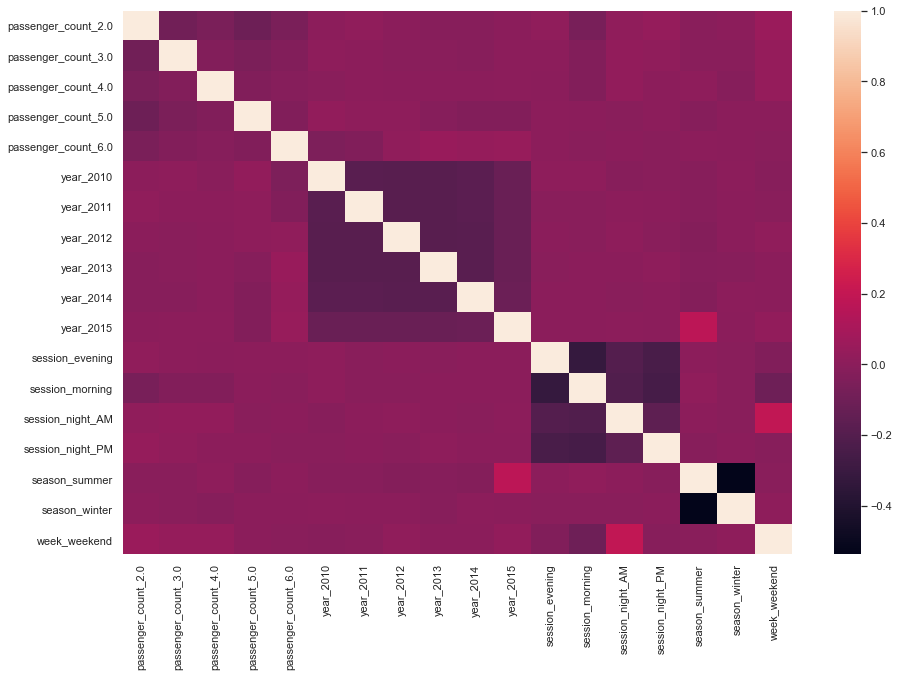

In [300]:
plt.figure(figsize=(15,10))
sns.heatmap(df[categorical_cols].corr())

In [ ]:
#Chi - square test of independence
#H0 - 2 variables are independent
#H1 - 2 variables are dependent


In [304]:
for i in categorical_cols:
    for j in categorical_cols:
        if i!=j:
            chi2, p , dof, ex = chi2_contingency(pd.crosstab(df[i],df[j]))
            if p < 0.05:
                print(f'{i} and {j} are dependent with {p} <- remove')
            '''else:
                print(f'{i} and {j} are independent with {p} <- keep')'''

passenger_count_2.0 and passenger_count_3.0 are dependent with 2.2702101645512557e-27 <- remove
passenger_count_2.0 and passenger_count_4.0 are dependent with 1.3922796410720992e-13 <- remove
passenger_count_2.0 and passenger_count_5.0 are dependent with 1.510307948144852e-42 <- remove
passenger_count_2.0 and passenger_count_6.0 are dependent with 1.2338720567273657e-12 <- remove
passenger_count_2.0 and year_2011 are dependent with 0.010918542484327446 <- remove
passenger_count_2.0 and session_evening are dependent with 0.024195793926468572 <- remove
passenger_count_2.0 and session_morning are dependent with 1.2808294877594294e-16 <- remove
passenger_count_2.0 and session_night_AM are dependent with 0.017798298149402658 <- remove
passenger_count_2.0 and session_night_PM are dependent with 2.400618756029418e-05 <- remove
passenger_count_2.0 and week_weekend are dependent with 6.70125375731121e-11 <- remove
passenger_count_3.0 and passenger_count_2.0 are dependent with 2.2702101645512715

session_morning and session_evening are dependent with 0.0 <- remove
session_morning and session_night_AM are dependent with 1.4729848248267267e-154 <- remove
session_morning and session_night_PM are dependent with 3.4039527815035424e-222 <- remove
session_morning and season_summer are dependent with 0.0272881582007091 <- remove
session_morning and week_weekend are dependent with 2.458014777544587e-38 <- remove
session_night_AM and passenger_count_2.0 are dependent with 0.017798298149402658 <- remove
session_night_AM and passenger_count_3.0 are dependent with 0.004166454635980804 <- remove
session_night_AM and passenger_count_4.0 are dependent with 0.0017995719879989366 <- remove
session_night_AM and session_evening are dependent with 8.509370654001378e-139 <- remove
session_night_AM and session_morning are dependent with 1.4729848248267267e-154 <- remove
session_night_AM and session_night_PM are dependent with 1.8523809667875902e-89 <- remove
session_night_AM and week_weekend are depe

In [ ]:
#checking for relation between the continuous variabels

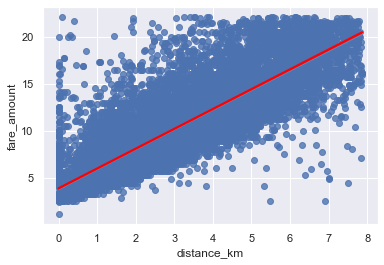

In [318]:
sns.regplot(x=df['distance_km'], y = df['fare_amount'], line_kws={'color':'red'})
#sns.lineplot(df[''])

In [ ]:
#we can clearly see there is a positive co-relation between the distance_km and the fare_amount

In [ ]:
#Test for Multi-colinearity using VIF(variance inflation factor)
#VIF  = (1/(1-R^2))
#VIF > 5 is considered very high 

In [324]:
def calc_vif(data):
    vif = pd.DataFrame()
    vif['variables'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

In [325]:
calc_vif(df)

,variables,VIF
0,fare_amount,17.026789
1,passenger_count_2.0,1.203629
2,passenger_count_3.0,1.060350
3,passenger_count_4.0,1.031009
4,passenger_count_5.0,1.087025
5,passenger_count_6.0,1.036582
6,year_2010,1.638897
7,year_2011,1.632292
8,year_2012,1.707486
9,year_2013,1.803998


In [ ]:
#Therefore looking at all the categorical variables no variable has a very high VIF and thus confirms that no variables needs to be dropped

In [ ]:
#Feature Scaling

In [ ]:
#To see if the distance_km is normally distributed

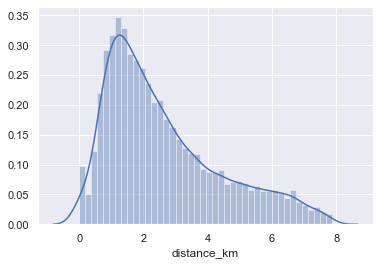

In [326]:
sns.distplot(df['distance_km'])

In [ ]:
#Thus we need to standardize the value
#value_new = (value - min_value)/(max_value - min_value)
#After standardising the values will range between 0 and 1

In [327]:
def standard(data):
    data['distance_km'] = (data['distance_km'] - min(data['distance_km']))/(max(data['distance_km']) - min(data['distance_km']))
    return data

In [328]:
#creating checkpoint
df_train6 = df.copy()

In [329]:
df = standard(df)

In [332]:
df.head()

,fare_amount,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,session_evening,session_morning,session_night_AM,session_night_PM,season_summer,season_winter,week_weekend,distance_km
0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.130865
1,16.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.079345
2,5.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.176562
3,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.355351
4,5.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.253993


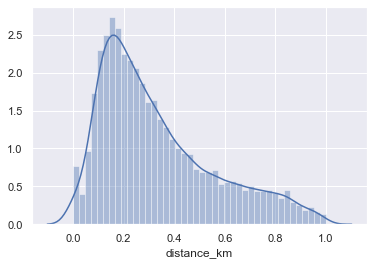

In [333]:
sns.distplot(df['distance_km'])

In [334]:
#Saving the completely pre-processed file
df.to_csv('Preprocessed_train.csv')

In [ ]:
#splitting data into train and test for model evaluation

In [336]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [339]:
X.head()
X.shape

(15582, 19)

In [340]:
y.head()
y.shape

(15582,)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42 )

In [342]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12465, 19) (3117, 19) (12465,) (3117,)


In [ ]:
#Model Evaluation Meterics

In [359]:
def evaluate_model(y,y_):
    r2 = r2_score(y, y_)
    print(f'The value of r^2 is: {r2}')
    r2_adjusted = 1 - (1 - r2)*(len(y) - 1)/(len(y) - X_train.shape[1] - 1)
    print(f'The value of Adjusted-r^2  is: {r2_adjusted}')
    mae = np.mean(np.abs(y - y_))
    print(f'The Absolute Mean Error is : {mae}')
    rmse = np.sqrt(mean_squared_error(y,y_))
    print(f'Root Mean Squared error : {rmse}')

In [ ]:
#Machine Learning model Implementation
#Multiple Linear Regression

In [ ]:
#1.Chosing the optimal parameters of the model

In [348]:
reg = LinearRegression()

reg_cv = GridSearchCV(reg, param_grid={'fit_intercept':[True,False], 'copy_X' : [True, False]}, scoring='r2', cv = 5)

reg_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [350]:
print(f'Tuned parameters are : {reg_cv.best_params_}')

Tuned parameters are : {'copy_X': True, 'fit_intercept': True}


In [351]:
#Tuned Linear Regression Model

linear_reg_model = LinearRegression(copy_X=True, fit_intercept=True)

linear_reg_model.fit(X_train, y_train)

linear_reg_model_predict = linear_reg_model.predict(X_test)

In [362]:
print('Training Data Score:')
evaluate_model(y_train, linear_reg_model.predict(X_train))

print('Test Data Score: ')
evaluate_model(y_test,linear_reg_model_predict)
print(linear_reg_model.coef_)

Training Data Score:
The value of r^2 is: 0.7303591840703934
The value of Adjusted-r^2  is: 0.7299475187025619
The Absolute Mean Error is : 1.645240724370096
Root Mean Squared error : 2.3112582991201482
Test Data Score: 
The value of r^2 is: 0.7388385859788489
The value of Adjusted-r^2  is: 0.7372363687149155
The Absolute Mean Error is : 1.678211850892539
Root Mean Squared error : 2.3445156624603376
[-1.58152355e-02  7.49757557e-02  1.78760601e-01  1.23592762e-01
  1.95560156e-01 -2.70589780e-02 -6.32472532e-02  4.38455443e-01
  1.33853207e+00  1.51655095e+00  1.73673428e+00 -3.55477023e-01
 -4.78235110e-01 -6.48780424e-01 -7.88575009e-01 -1.78733341e-01
 -1.65292496e-01 -1.68276906e-01  1.66198832e+01]


In [366]:
#Cross validation score

cv_score = cross_val_score(reg,X,y, cv=5, scoring='neg_mean_squared_error')

print(cv_score, np.mean(cv_score))

[-5.51137752 -5.34652536 -5.2801964  -5.37201165 -5.41380564] -5.384783314848783


In [ ]:
#Ridge regression
#Optimal param

In [368]:
r_reg = Ridge()

r_reg_cv = GridSearchCV(r_reg, param_grid={'alpha' : np.logspace(-2,0,50), 'normalize': [True,False], 'max_iter' :range(500,5000,500)}, 
                       scoring='r2', cv=5)
r_reg_cv.fit(X,y)


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
       0.01599859, 0.01757511, 0.01930698, 0.02120951, 0.02329952,
       0.02559548, 0.02811769, 0.03...
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ]),
                         'max_iter': range(500, 5000, 500),
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [369]:
print(f'Tuned parameters are : {r_reg_cv.best_params_}')

Tuned parameters are : {'alpha': 0.32374575428176433, 'max_iter': 500, 'normalize': False}


In [370]:
ridge_reg_model = Ridge(alpha=0.32374575428176433, max_iter=500, normalize=False)

ridge_reg_model.fit(X_train, y_train)

ridge_reg_model_predict = ridge_reg_model.predict(X_test)

In [371]:
print('Training Data Score:')
evaluate_model(y_train, ridge_reg_model.predict(X_train))

print('Test Data Score: ')
evaluate_model(y_test,ridge_reg_model_predict)
print(ridge_reg_model.coef_)

Training Data Score:
The value of r^2 is: 0.7303589847053527
The value of Adjusted-r^2  is: 0.7299473190331471
The Absolute Mean Error is : 1.6454323787008445
Root Mean Squared error : 2.3112591535605604
Test Data Score: 
The value of r^2 is: 0.7388200544551927
The value of Adjusted-r^2  is: 0.7372177235009301
The Absolute Mean Error is : 1.6784706772657927
Root Mean Squared error : 2.3445988421997987
[-1.57978473e-02  7.49291633e-02  1.78633267e-01  1.23364492e-01
  1.95595215e-01 -2.78850218e-02 -6.39458574e-02  4.37626715e-01
  1.33751000e+00  1.51547083e+00  1.73525660e+00 -3.55031670e-01
 -4.77753033e-01 -6.47453792e-01 -7.87709267e-01 -1.78621654e-01
 -1.65301883e-01 -1.68160922e-01  1.66112027e+01]


In [372]:
r_cv_score = cross_val_score(r_reg,X,y, cv=5, scoring='neg_mean_squared_error')

print(cv_score, np.mean(cv_score))

[-5.51137752 -5.34652536 -5.2801964  -5.37201165 -5.41380564] -5.384783314848783


In [ ]:
#Lasso Regression
#Optimal Params

In [374]:
l_reg = Lasso()

l_reg_cv = GridSearchCV(l_reg, param_grid={'alpha' : np.logspace(-2,0,50), 'normalize': [True,False], 'max_iter' :range(500,5000,500)}, 
                       scoring='r2', cv=5)
l_reg_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
       0.01599859, 0.01757511, 0.01...
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ]),
                         'max_iter': range(500, 5000, 500),
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2

In [375]:
print(f'Tuned parameters are: {l_reg_cv.best_params_}')

Tuned parameters are: {'alpha': 0.01, 'max_iter': 500, 'normalize': False}


In [376]:
lasso_reg_model = Lasso(alpha=0.01, max_iter=500, normalize=False)

lasso_reg_model.fit(X_train, y_train)

lasso_reg_model_predict = lasso_reg_model.predict(X_test)

In [377]:
print('Training Data Score:')
evaluate_model(y_train, lasso_reg_model.predict(X_train))

print('Test Data Score: ')
evaluate_model(y_test,lasso_reg_model_predict)
print(lasso_reg_model.coef_)

Training Data Score:
The value of r^2 is: 0.729097417526163
The value of Adjusted-r^2  is: 0.7286838257971953
The Absolute Mean Error is : 1.6549910388439353
Root Mean Squared error : 2.316659678588732
Test Data Score: 
The value of r^2 is: 0.7374672613041283
The value of Adjusted-r^2  is: 0.7358566310053807
The Absolute Mean Error is : 1.6877074326989459
Root Mean Squared error : 2.350662976999091
[-0.          0.          0.          0.          0.         -0.10309073
 -0.13174002  0.24350778  1.14200817  1.31497335  1.42290229 -0.13302466
 -0.26176494 -0.37515778 -0.53853611 -0.06440627 -0.05537246 -0.11182107
 16.38333964]


In [ ]:
#Decision Tree

In [380]:
tree_reg = DecisionTreeRegressor()

tree_reg_cv = GridSearchCV(tree_reg, 
                          param_grid= {'max_depth': range(2,20,2),'min_samples_split':range(2,20,2)}, 
                          cv=5)
tree_reg_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_split': range(2, 20, 2)},
             pre_dispatch='2*n_jobs'

In [381]:
print(f'Tuned Parameters are : {tree_reg_cv.best_params_}')

Tuned Parameters are : {'max_depth': 6, 'min_samples_split': 2}


In [382]:
tree_reg_model = DecisionTreeRegressor(max_depth=6, min_samples_split=2)

tree_reg_model.fit(X_train, y_train)

tree_reg_model_predict = tree_reg_model.predict(X_test)

In [384]:
print('Training Data Score:')
evaluate_model(y_train, tree_reg_model.predict(X_train))

print('Test Data Score: ')
evaluate_model(y_test,tree_reg_model_predict)
#print(tree_reg_model.coef_)

Training Data Score:
The value of r^2 is: 0.7419685921122552
The value of Adjusted-r^2  is: 0.7415746510315105
The Absolute Mean Error is : 1.6226724706188556
Root Mean Squared error : 2.260955180491699
Test Data Score: 
The value of r^2 is: 0.7335859670610554
The value of Adjusted-r^2  is: 0.7319515251411846
The Absolute Mean Error is : 1.692802978866932
Root Mean Squared error : 2.367975371527145


In [ ]:
#Random Forest Regressor

In [387]:
f_reg = RandomForestRegressor()

f_reg_cv = GridSearchCV(f_reg,
                       param_grid={'n_estimators' : range(100,500,100), 'max_depth': range(2,20,2), 
                                   'min_samples_split' : range(2,5,1),
                                  'min_samples_leaf' : range(2,5,1),
                                  'bootstrap' : [True, False],
                                   'max_features' : ['auto','log2','sqrt']},
                       cv=5)
f_reg_cv.fit(X,y)

KeyboardInterrupt: 

In [388]:
print(f'Tuned paramters are :{f_reg_cv.best_params_}')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [389]:
f_reg_model = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_depth=9, max_features='auto', bootstrap=True,
                                   min_samples_leaf= 4)

f_reg_model.fit(X_train, y_train)

f_reg_model_predict = f_reg_model.predict(X_test)

In [391]:
print('Training Data Score:')
evaluate_model(y_train, f_reg_model.predict(X_train))

print('Test Data Score: ')
evaluate_model(y_test,f_reg_model_predict)

Training Data Score:
The value of r^2 is: 0.7856980754983974
The value of Adjusted-r^2  is: 0.785370896987708
The Absolute Mean Error is : 1.4766137098135521
Root Mean Squared error : 2.0604814207639035
Test Data Score: 
The value of r^2 is: 0.7474434544966244
The value of Adjusted-r^2  is: 0.7458940278370945
The Absolute Mean Error is : 1.647020473124045
Root Mean Squared error : 2.3055680596948984


In [392]:
f_cv_score = cross_val_score(f_reg,X,y, cv=5, scoring='neg_mean_squared_error')

print(cv_score, np.mean(cv_score))

[-5.51137752 -5.34652536 -5.2801964  -5.37201165 -5.41380564] -5.384783314848783


In [ ]:
#Elastic-Net Regression

In [413]:
e_net = ElasticNet()

e_net_cv = RandomizedSearchCV(e_net,
                       param_distributions={'alpha' : np.logspace(-4,0,30),
                                  'l1_ratio' : np.logspace(-4,0,30),
                                  'fit_intercept' : [True,False],
                                  'copy_X' : [True,False],
                                  'max_iter' : range(100,1000,100),
                                  'normalize' : [True, False]},
                       cv=5,
                       scoring='r2')
e_net_cv.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': array([1.00000000e-04, 1.37382380e-04, 1....
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00]),
                                        'max_iter': range(100, 1000, 100),
                                        

In [414]:
print(f'Tuned parameters are : {e_net_cv.best_params_}')

Tuned parameters are : {'normalize': False, 'max_iter': 100, 'l1_ratio': 1.0, 'fit_intercept': False, 'copy_X': True, 'alpha': 0.0006723357536499335}


In [415]:
e_net_model = ElasticNet(normalize=False, max_iter=100, l1_ratio=1.0, fit_intercept=False, copy_X=True, 
                         alpha=0.0006723357536499335)

e_net_model.fit(X_train,y_train)

e_net_model_predict = e_net_model.predict(X_test)

In [416]:
print('Training Data Score:')
evaluate_model(y_train, e_net_model.predict(X_train))

print('Test Data Score: ')
evaluate_model(y_test,e_net_model_predict)
print(e_net_model.coef_)

Training Data Score:
The value of r^2 is: 0.6801533142540983
The value of Adjusted-r^2  is: 0.6796649987033412
The Absolute Mean Error is : 1.8005340605586004
Root Mean Squared error : 2.5172514213178867
Test Data Score: 
The value of r^2 is: 0.6899074325321388
The value of Adjusted-r^2  is: 0.6880050241427654
The Absolute Mean Error is : 1.8405915210050163
Root Mean Squared error : 2.5547259011626773
[ 0.3263381   0.45726665  0.49411805  0.57972454  0.3410252   1.62954181
  1.59932987  2.10918082  3.03225115  3.21730278  3.10547447  0.74873109
  0.63645915  0.18833962  0.2287371   0.70698071  0.76206267  0.17698988
 18.17250834]


In [ ]:
#From the above implemented models the tuned random forest model gives the best results and hence can be implemented on the test data set of the project in order to predict the cab fare prices

In [545]:
#importing the test data

df_test = pd.read_csv('test.csv')

In [546]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [547]:
df_final = df_test.copy()

In [506]:
df_test.passenger_count.value_counts()

1.0    6914
2.0    1474
5.0     696
3.0     447
4.0     206
6.0     177
Name: passenger_count, dtype: int64

In [468]:
df_test.shape

(9914, 6)

In [ ]:
#Implementing all the preprocessing steps on the test set

In [481]:
df_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [548]:
df_test.passenger_count.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [471]:
print('pickup_longitude > 180 :' + str(sum(df_test['pickup_longitude'] > 180)))
print('pickup_longitude < -180 :' + str(sum(df_test['pickup_longitude'] < -180)))
print('pickup_latitude > 90 :' + str(sum(df_test['pickup_latitude'] > 90)))
print('pickup_latitude < -90 :' + str(sum(df_test['pickup_latitude'] < -90)))

print('dropoff_longitude > 180 :' + str(sum(df_test['dropoff_longitude'] > 180)))
print('dropoff_longitude < -180 :' + str(sum(df_test['dropoff_longitude'] < -180)))
print('dropoff_latitude > 90 :' + str(sum(df_test['dropoff_latitude'] > 90)))
print('dropoff_latitude < -90 :' + str(sum(df_test['dropoff_latitude'] < -90)))


pickup_longitude > 180 :0
pickup_longitude < -180 :0
pickup_latitude > 90 :0
pickup_latitude < -90 :0
dropoff_longitude > 180 :0
dropoff_longitude < -180 :0
dropoff_latitude > 90 :0
dropoff_latitude < -90 :0


In [549]:
df_test['pickup_datetime'] = pd.to_datetime(df_test.pickup_datetime, errors='coerce')

In [550]:
extract_times(df_test)

In [551]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21


In [552]:
df_test['session'] = df_test['hour'].apply(cat_time)
df_test['season'] = df_test['month'].apply(cat_seasons)
df_test['week'] = df_test['day_of_week'].apply(cat_week)

In [553]:
df_test['passenger_count'] = df_test['passenger_count'].astype('float64')

In [554]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,session,season,week
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,1,13,afternoon,winter,weekday
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,1,13,afternoon,winter,weekday
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1.0,2011,10,5,11,morning,monsoon,weekend
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1.0,2012,12,5,21,night_PM,winter,weekend
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1.0,2012,12,5,21,night_PM,winter,weekend


In [555]:
df_test = add_dummies(df_test)

In [556]:
df_test.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'season', 'week',
       'passenger_count_1.0', 'passenger_count_2.0', 'passenger_count_3.0',
       'passenger_count_4.0', 'passenger_count_5.0', 'passenger_count_6.0',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'season_monsoon', 'season_summer', 'season_winter', 'week_weekday',
       'week_weekend'],
      dtype='object')

In [557]:
df_test = df_test.drop(columns = columns_to_drop, axis = 1)

In [558]:
df_test = calc_distance(df_test)

In [560]:
def outlier_detect_test(col):
    q75,q25 = np.percentile(df_test.loc[:,col], [75,25])
    iqr = q75 - q25 #interquartile range
    min_val = q25 - (1.5*iqr)
    max_val = q75 + (1.5*iqr)
    
    print(min_val,max_val)
    #return min_val, max_val
    
    #assigning the outliers as nan
    df_test.loc[df[col] < min_val, col] = np.nan
    df_test.loc[df[col] > max_val, col] = np.nan


In [562]:
df_test = standard(df_test)

In [563]:
df_test = drop_fe_vars(df_test)

In [518]:
X.head()

,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,session_evening,session_morning,session_night_AM,session_night_PM,season_summer,season_winter,week_weekend,distance_km
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.130865
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.079345
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.176562
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.355351
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.253993


In [565]:
for i in ['passenger_count_2.0', 'passenger_count_3.0', 'passenger_count_4.0',
       'passenger_count_5.0', 'passenger_count_6.0', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'season_summer', 'season_winter', 'week_weekend']:
    df_test[i] = df_test[i].astype('float64')

In [566]:
df_test.head()

,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,session_evening,session_morning,session_night_AM,session_night_PM,season_summer,season_winter,week_weekend,distance_km
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.023195
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.024223
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.006178
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.019584
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.053794


In [537]:
df.head()

,fare_amount,passenger_count_2.0,passenger_count_3.0,passenger_count_4.0,passenger_count_5.0,passenger_count_6.0,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,session_evening,session_morning,session_night_AM,session_night_PM,season_summer,season_winter,week_weekend,distance_km
0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.130865
1,16.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.079345
2,5.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.176562
3,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.355351
4,5.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.253993


In [527]:
df_test.shape

(9914, 19)

In [ ]:
#Using the Random Forest Regressor model to predict the values of test data set 

In [458]:
test_f_reg = RandomForestRegressor()

test_f_reg_cv = RandomizedSearchCV(test_f_reg,
                                  param_distributions={'n_estimators' : range(100,500,100), 'max_depth': range(2,20,2), 
                                   'min_samples_split' : range(2,5,1),
                                  'min_samples_leaf' : range(2,5,1),
                                  'bootstrap' : [True, False],
                                   'max_features' : ['auto','log2','sqrt']},
                                  cv = 5)
test_f_reg_cv.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [528]:
print(f'Tuned parameters are: {test_f_reg_cv.best_params_}')

Tuned parameters are: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': True}


In [540]:
test_f_reg_model = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_depth=9, max_features='auto', bootstrap=True,
                                   min_samples_leaf= 4)

test_f_reg_model.fit(X,y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [581]:
print('Training Data Score:')
evaluate_model(y, test_f_reg_model.predict(X))

Training Data Score:
The value of r^2 is: 0.7837417801947978
The value of Adjusted-r^2  is: 0.7834777456120772
The Absolute Mean Error is : 1.4962930362811635
Root Mean Squared error : 2.0827978186746345


In [567]:
test_f_reg_model_predict = test_f_reg_model.predict(df_test)

In [568]:
test_f_reg_model_predict[:100]

array([5.04808034, 4.95482271, 5.64716034, 5.48177097, 4.68940891,
       4.89437196, 6.1744899 , 6.91761862, 4.36005701, 6.4430357 ,
       5.0338339 , 4.71192896, 5.12952276, 5.99892196, 4.7690365 ,
       4.24779233, 4.73084901, 4.69155299, 4.96761942, 4.98362998,
       6.22443345, 5.28731038, 5.3314425 , 5.80405123, 4.73793736,
       6.10989165, 6.09969071, 4.96624681, 6.10989165, 4.72992175,
       4.94220315, 5.44463854, 5.89368946, 4.94220315, 5.20888369,
       5.77709349, 6.10989165, 5.50637925, 5.77709349, 5.07494937,
       4.83748068, 5.0244233 , 4.70182525, 5.06773302, 5.00961595,
       4.98255986, 5.50637925, 5.34799882, 5.83912657, 5.05375029,
       4.98263709, 5.62699925, 4.70182525, 6.10989165, 5.3314425 ,
       4.68648108, 5.65383516, 5.0244233 , 5.86862114, 5.62727858,
       5.3314425 , 5.08244373, 5.07494937, 5.07494937, 5.77709349,
       5.3314425 , 5.09768141, 5.73411948, 5.00961595, 4.70730225,
       5.35361164, 5.00961595, 4.94220315, 5.36189078, 5.02442

In [571]:
df_final['Predicted_fair'] = test_f_reg_model_predict

In [575]:
df_final.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Predicted_fare
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,5.048080
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,4.954823
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,5.647160
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,5.481771
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,4.689409


In [576]:
df_final.to_csv('predicted_test_fare.csv')

In [579]:
joblib.dump(test_f_reg_model, 'final_random_forest_model.joblib')

['final_random_forest_model.joblib']